In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import oracledb
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
dsn = oracledb.makedsn("localhost", 1522, service_name="stu")
connection = oracledb.connect(user="ora_rlyaga", password="a70216460", dsn=dsn)

#test to make sure its connected
cur = connection.cursor()
for row in cur.execute("select * from HealthExpenditures"):
    print(row)
cur.close()

(1, 2009, 'F', 'middle-age', 6648365793, 43057)
(2, 2009, 'F', 'minor', 1304204278, 24387)
(3, 2009, 'F', 'senior', 6341276122, 138183)
(4, 2009, 'M', 'middle-age', 5643496801, 36890)
(5, 2009, 'M', 'minor', 1450135284, 26515)
(6, 2009, 'M', 'senior', 5119577611, 139461)
(7, 2010, 'F', 'middle-age', 6970375993, 44484)
(8, 2010, 'F', 'minor', 1360206902, 26078)
(9, 2010, 'F', 'senior', 6625478434, 139156)
(10, 2010, 'M', 'middle-age', 5935962238, 38110)
(11, 2010, 'M', 'minor', 1483186140, 27375)
(12, 2010, 'M', 'senior', 5568838890, 145478)
(13, 2011, 'F', 'middle-age', 7061430786, 44593)
(14, 2011, 'F', 'minor', 1339100731, 25455)
(15, 2011, 'F', 'senior', 7313125214, 152740)
(16, 2011, 'M', 'middle-age', 6070766215, 38567)
(17, 2011, 'M', 'minor', 1440814316, 26537)
(18, 2011, 'M', 'senior', 5965891757, 154568)
(19, 2012, 'F', 'middle-age', 7290461250, 45308)
(20, 2012, 'F', 'minor', 1373146085, 25858)
(21, 2012, 'F', 'senior', 8068418362, 168025)
(22, 2012, 'M', 'middle-age', 628833

In [3]:
sql_query = "SELECT YEAR, GENDER, AGEGROUP, TOTALCURRENTDOLLARSPERCAPITA FROM HealthExpenditures"
df = pd.read_sql(sql_query, con=connection)
print(df.head())

   YEAR GENDER    AGEGROUP  TOTALCURRENTDOLLARSPERCAPITA
0  2009      F  middle-age                         43057
1  2009      F       minor                         24387
2  2009      F      senior                        138183
3  2009      M  middle-age                         36890
4  2009      M       minor                         26515


/tmp/ipykernel_1432/2133677444.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, con=connection)


In [4]:
data = df
# Fit the model for ANOVA
model = ols('TOTALCURRENTDOLLARSPERCAPITA ~ C(AGEGROUP) + C(GENDER)', data=data).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                   sum_sq    df            F        PR(>F)
C(AGEGROUP)  3.272400e+11   2.0  1199.560379  2.247461e-60
C(GENDER)    3.265474e+06   1.0     0.023940  8.774263e-01
Residual     1.091200e+10  80.0          NaN           NaN


In [5]:
# Ensure the 'YEAR' column is in integer format
data['YEAR'] = data['YEAR'].astype(int)
# Ensure 'minor' is the reference category for AGEGROUP
data['AGEGROUP'] = pd.Categorical(data['AGEGROUP'], categories=['minor', 'middle-age', 'senior'], ordered=False)

# Fit the linear regression model with YEAR as an independent variable
model_year = ols('TOTALCURRENTDOLLARSPERCAPITA ~ YEAR + C(AGEGROUP) + C(GENDER)', data=data).fit()

# Print the model summary to check the coefficients
print(model_year.summary())

                                 OLS Regression Results                                 
Dep. Variable:     TOTALCURRENTDOLLARSPERCAPITA   R-squared:                       0.988
Model:                                      OLS   Adj. R-squared:                  0.987
Method:                           Least Squares   F-statistic:                     1633.
Date:                          Tue, 08 Apr 2025   Prob (F-statistic):           4.51e-75
Time:                                  18:56:43   Log-Likelihood:                -862.11
No. Observations:                            84   AIC:                             1734.
Df Residuals:                                79   BIC:                             1746.
Df Model:                                     4                                         
Covariance Type:                      nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------

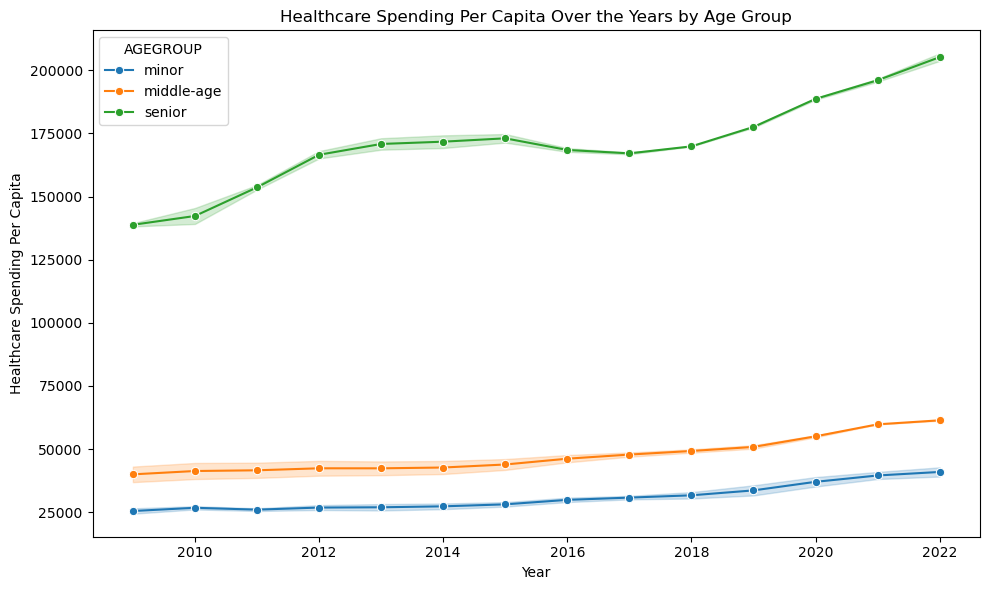

In [6]:
# Create a line plot to visualize healthcare spending over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='YEAR', y='TOTALCURRENTDOLLARSPERCAPITA', data=data, hue='AGEGROUP', marker='o')

# Add title and labels
plt.title('Healthcare Spending Per Capita Over the Years by Age Group')
plt.xlabel('Year')
plt.ylabel('Healthcare Spending Per Capita')
plt.tight_layout()

# Show the plot
plt.show()

In [7]:
# Fit the linear regression model with YEAR and GENDER as independent variables
model_gender = ols('TOTALCURRENTDOLLARSPERCAPITA ~ YEAR + C(GENDER) + C(AGEGROUP)', data=data).fit()

# Print the model summary to check the coefficients and significance
print(model_gender.summary())

                                 OLS Regression Results                                 
Dep. Variable:     TOTALCURRENTDOLLARSPERCAPITA   R-squared:                       0.988
Model:                                      OLS   Adj. R-squared:                  0.987
Method:                           Least Squares   F-statistic:                     1633.
Date:                          Tue, 08 Apr 2025   Prob (F-statistic):           4.51e-75
Time:                                  18:56:47   Log-Likelihood:                -862.11
No. Observations:                            84   AIC:                             1734.
Df Residuals:                                79   BIC:                             1746.
Df Model:                                     4                                         
Covariance Type:                      nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------

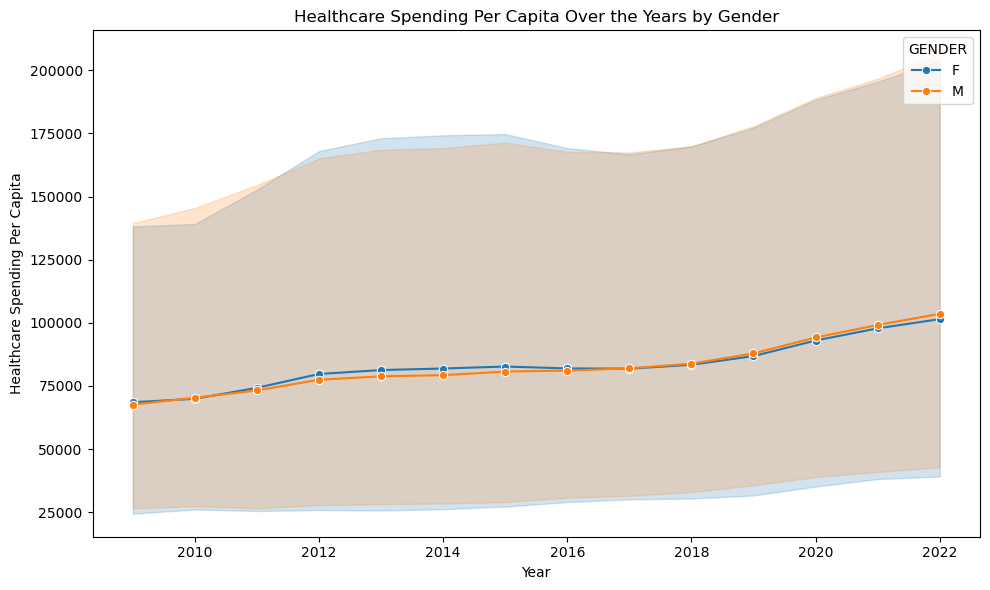

In [8]:
# Create a line plot to visualize healthcare spending over the years by gender
plt.figure(figsize=(10, 6))
sns.lineplot(x='YEAR', y='TOTALCURRENTDOLLARSPERCAPITA', data=data, hue='GENDER', marker='o')

# Add title and labels
plt.title('Healthcare Spending Per Capita Over the Years by Gender')
plt.xlabel('Year')
plt.ylabel('Healthcare Spending Per Capita')
plt.tight_layout()

# Show the plot
plt.show()